In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Librerías cargadas correctamente")

✓ Librerías cargadas correctamente


In [3]:
# El dataset NSL-KDD no tiene headers, los definimos manualmente
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty'
]

print(f"Total de columnas: {len(column_names)}")

Total de columnas: 43


In [4]:
# Cargar dataset de entrenamiento
df_train = pd.read_csv('../data/raw/KDDTrain+.txt', 
                       names=column_names, 
                       header=None)

# Cargar dataset de prueba
df_test = pd.read_csv('../data/raw/KDDTest+.txt', 
                      names=column_names, 
                      header=None)

print(f"📊 Datos de entrenamiento: {df_train.shape}")
print(f"📊 Datos de prueba: {df_test.shape}")

📊 Datos de entrenamiento: (125973, 43)
📊 Datos de prueba: (22544, 43)


In [5]:
# Ver las primeras filas
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
# Información general
print("=" * 50)
print("INFORMACIÓN DEL DATASET")
print("=" * 50)
df_train.info()

INFORMACIÓN DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              12597


🎯 Distribución de etiquetas (tipos de tráfico):
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


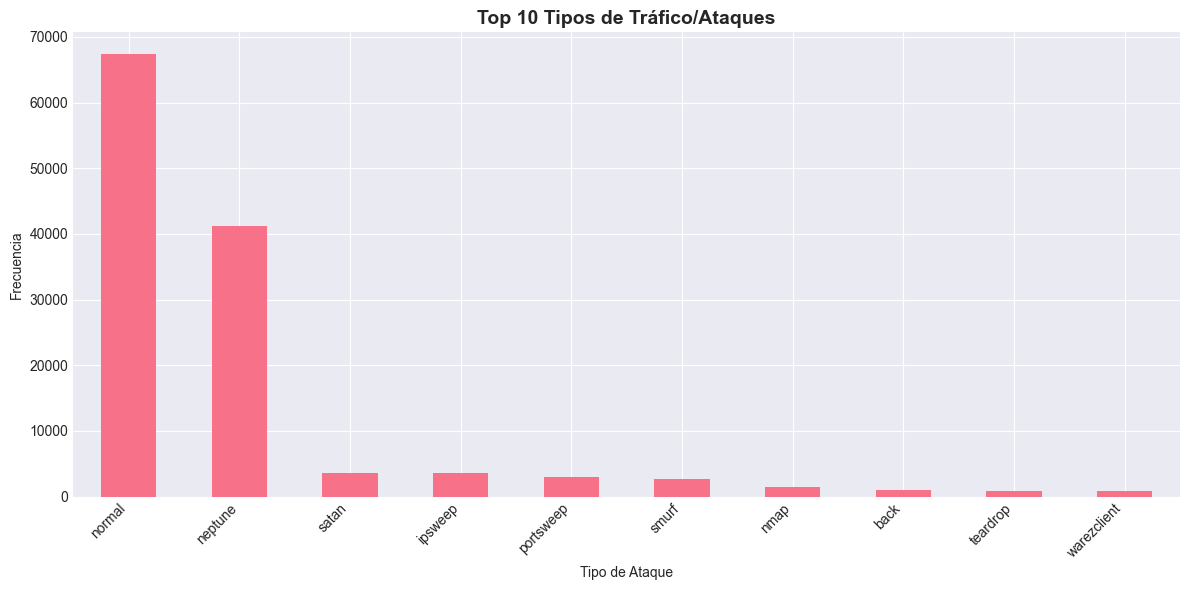

In [7]:
# Ver qué tipos de ataques tenemos
print("\n🎯 Distribución de etiquetas (tipos de tráfico):")
print(df_train['label'].value_counts())

# Visualización
plt.figure(figsize=(12, 6))
df_train['label'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Tipos de Tráfico/Ataques', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
print("="*60)
print("ANÁLISIS DEL DATASET NSL-KDD")
print("="*60)

# 1. Dimensiones
print(f"\n1️⃣ DIMENSIONES:")
print(f"   - Filas (registros): {df_train.shape[0]:,}")
print(f"   - Columnas (features): {df_train.shape[1]}")

# 2. Tipos de ataques
print(f"\n2️⃣ TIPOS DE ATAQUES:")
print(f"   - Tipos únicos: {df_train['label'].nunique()}")
print(f"   - Categorías principales: Normal, DoS, Probe, R2L, U2R")

# 3. Desbalance
print(f"\n3️⃣ DESBALANCE DE CLASES:")
top_5 = df_train['label'].value_counts().head(5)
for ataque, cantidad in top_5.items():
    porcentaje = (cantidad / len(df_train)) * 100
    print(f"   - {ataque:15s}: {cantidad:6,} ({porcentaje:5.2f}%)")

print(f"\n⚠️  Existe desbalance significativo entre clases")

ANÁLISIS DEL DATASET NSL-KDD

1️⃣ DIMENSIONES:
   - Filas (registros): 125,973
   - Columnas (features): 43

2️⃣ TIPOS DE ATAQUES:
   - Tipos únicos: 23
   - Categorías principales: Normal, DoS, Probe, R2L, U2R

3️⃣ DESBALANCE DE CLASES:
   - normal         : 67,343 (53.46%)
   - neptune        : 41,214 (32.72%)
   - satan          :  3,633 ( 2.88%)
   - ipsweep        :  3,599 ( 2.86%)
   - portsweep      :  2,931 ( 2.33%)

⚠️  Existe desbalance significativo entre clases
